<a href="https://colab.research.google.com/github/Rudra007611/Rudra007611/blob/main/BirdstrikeAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 0: Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("/content/Bird Strikes data (1).csv", encoding='ISO-8859-1')


In [ ]:
# Step 2: Handle missing values
# For numeric columns, fill with the median
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

In [ ]:
# For categorical columns, fill with the mode
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

In [ ]:
# Step 3: Feature selection
features = ['Altitude bin', 'When: Phase of flight', 'Conditions: Sky', 'Wildlife: Size', 'Cost: Total $']
target = 'Effect: Indicated Damage'


In [ ]:

# Step 4: Encode categorical variables
X = pd.get_dummies(df[features])
y = df[target]


In [ ]:
# Step 5: Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Step 6: Train the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Step 7: Predict on test data
y_pred = model.predict(X_test)

In [ ]:
# Step 8: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 0.93


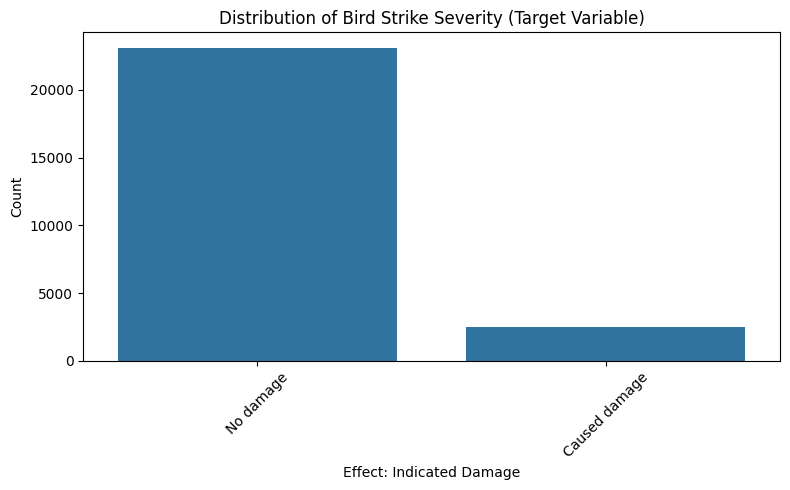

In [ ]:
# Step 9: Plot the distribution of the target variable
plt.figure(figsize=(8, 5))
sns.countplot(x=y, order=y.value_counts().index)
plt.title("Distribution of Bird Strike Severity (Target Variable)")
plt.xlabel("Effect: Indicated Damage")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

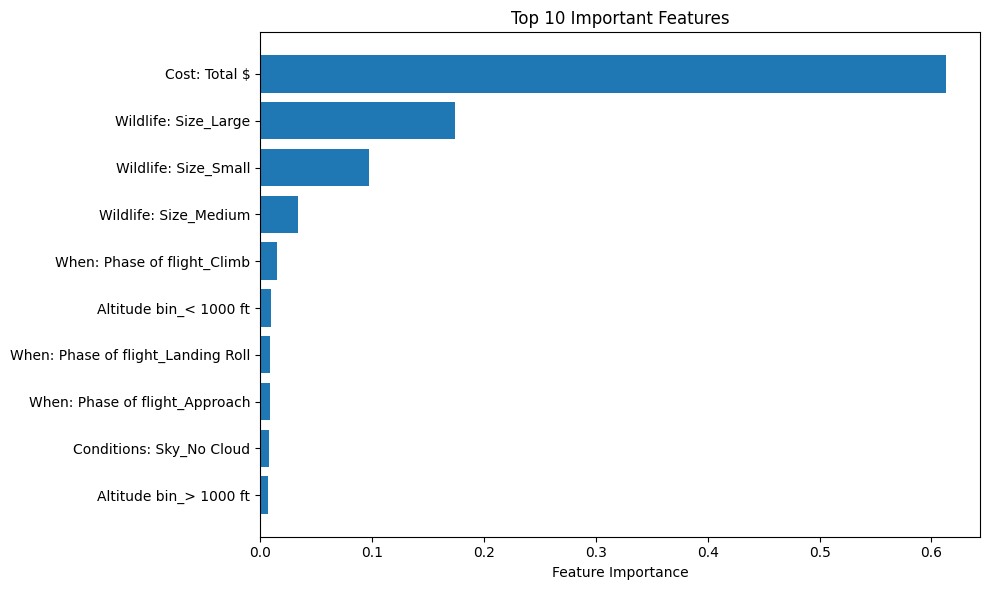

In [ ]:
# Step 10: Plot feature importance
importances = model.feature_importances_
indices = np.argsort(importances)[-10:]  # Top 10 important features
plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel("Feature Importance")
plt.title("Top 10 Important Features")
plt.tight_layout()
plt.show()


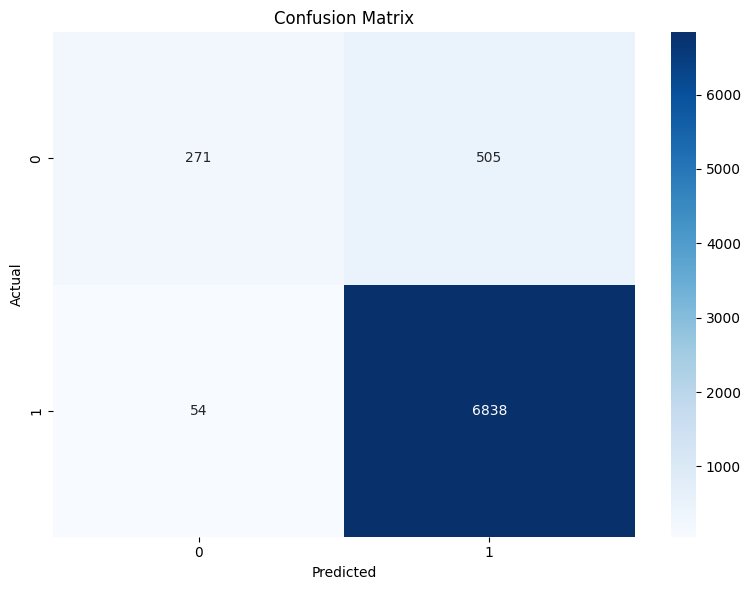

In [ ]:
# Step 11: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [ ]:
# Step 12: Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

               precision    recall  f1-score   support

Caused damage       0.83      0.35      0.49       776
    No damage       0.93      0.99      0.96      6892

     accuracy                           0.93      7668
    macro avg       0.88      0.67      0.73      7668
 weighted avg       0.92      0.93      0.91      7668

